In [1]:
3 + 3

6

In [12]:
import csv
from matplotlib import pyplot as plt

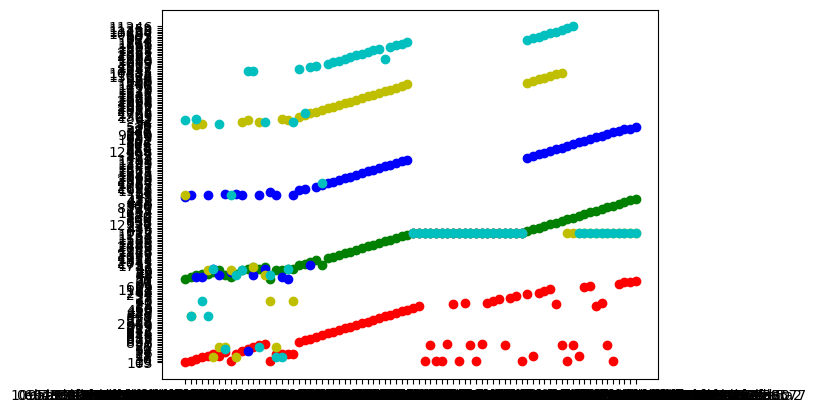

In [29]:
stats = {}
types = ['garnix', 'github-actions-cachix-parallel', 'github-actions-cachix-serial', 'github-actions-parallel', 'github-actions-serial'] 
colors = ['r', 'g', 'b', 'y', 'c']
xs = {}
commits = []
for t in types:
    xs[t] = []
with open('output.csv') as file:
    reader = csv.DictReader(file)
    for row in reader:
        commits.append(row['Commit'])
        for t in types:
            xs[t].append(row[t])

for index, t in enumerate(types):
    plt.scatter(commits, xs[t], color=colors[index])
        

In [46]:
repos = []
commits = []
d = {}
with open('output.csv') as file:
    reader = csv.DictReader(file)
    for row in reader:
        commits.append(row['Commit'])
        if row['Repo'] not in repos: repos.append(row['Repo'])

print(repos)
for repo in repos:
    d[repo] = {}
    for t in types:
        d[repo][t] = { "sum": 0, "count": 0}

with open('output.csv') as file:
    reader = csv.DictReader(file)
    for row in reader:
        for repo in repos:
            if row['Repo'] == repo:
                for t in types:
                    try:
                        d[repo][t]["sum"] += int(row[t])
                        d[repo][t]["count"] += 1
                    except Exception:
                        print(row, t)

for repo in d:
    print(repo)
    for t in d[repo]:
        if d[repo][t]["count"] == 0:
            print("  {}: no data".format(t))
        else:
            print("  {}: {} avg".format(t, d[repo][t]["sum"] / d[repo][t]["count"]))
                
   

['data/Effect-TS/effect', 'data/agda/agda', 'data/coder/code-server', 'data/crytic/echidna']
{'Repo': 'data/coder/code-server', 'Commit': '7649b6e6cac498a85c32bac9feb9ba6090b94c52', 'garnix': '60', 'github-actions-cachix-parallel': '', 'github-actions-cachix-serial': '', 'github-actions-parallel': '', 'github-actions-serial': ''} github-actions-cachix-parallel
{'Repo': 'data/coder/code-server', 'Commit': '7649b6e6cac498a85c32bac9feb9ba6090b94c52', 'garnix': '60', 'github-actions-cachix-parallel': '', 'github-actions-cachix-serial': '', 'github-actions-parallel': '', 'github-actions-serial': ''} github-actions-cachix-serial
{'Repo': 'data/coder/code-server', 'Commit': '7649b6e6cac498a85c32bac9feb9ba6090b94c52', 'garnix': '60', 'github-actions-cachix-parallel': '', 'github-actions-cachix-serial': '', 'github-actions-parallel': '', 'github-actions-serial': ''} github-actions-parallel
{'Repo': 'data/coder/code-server', 'Commit': '7649b6e6cac498a85c32bac9feb9ba6090b94c52', 'garnix': '60', '